### 初始化环境与数据

In [1]:
! chcp 65001
# 下载模拟交易代码
! git clone https://gitee.com/jaydencheng/quantitative-trading-simulation.git
! xcopy .\quantitative-trading-simulation\quant_mock .\quant_mock /y /e /i /q
! xcopy .\quantitative-trading-simulation\data .\data /y /e /i /q
! rd /S /Q quantitative-trading-simulation
! dir

Active code page: 65001


Cloning into 'quantitative-trading-simulation'...


3 File(s) copied
3 File(s) copied
 Volume in drive C is Windows
 Volume Serial Number is F215-1E3C

 Directory of c:\Users\jayde\Desktop\test

2022/09/02  23:33    <DIR>          .
2022/09/02  23:33    <DIR>          ..
2022/09/02  23:33    <DIR>          data
2022/09/02  23:33    <DIR>          quant_mock
2022/09/02  23:20           168,029 test.ipynb
               1 File(s)        168,029 bytes
               4 Dir(s)  188,058,759,168 bytes free


In [2]:
import quant_mock as qm # 导入模拟交易代码
import pandas as pd
import datetime as dt

In [3]:
market_data = {
    'SSEA': pd.read_csv('./data/ssea.csv', index_col='date', parse_dates=True),
    'BTC': pd.read_excel('./data/Bitcoin.xlsx', 'Bitcoin', index_col='date'),
    'Brent': pd.read_excel('./data/Brent.xlsx', 'Brent', index_col='date')
} # 读取数据

In [4]:
# 设置参数
TEST_DAYS = 183 # 回测时长
START_DAY = dt.datetime(2022, 3, 1)
CAPITAL = 5000000 # 本金
GRID = [0.97, 0.98, 0.99, 1, 1.01, 1.02, 1.03] # 网格设置

In [5]:
# 创建账户与环境
account = qm.Account(market_data,START_DAY, CAPITAL)

### 市场数据与可视化

In [6]:
account.market['BTC'].head(3) # 查看比特币市场信息

,closed,open,high,low,volume
date,,,,,
2022-01-01,47738.0,46217.5,47917.6,46217.5,31240.0
2022-01-02,47311.8,47738.7,47944.9,46718.2,27020.0
2022-01-03,46430.2,47293.9,47556.0,45704.0,41060.0


<module 'matplotlib.pyplot' from 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

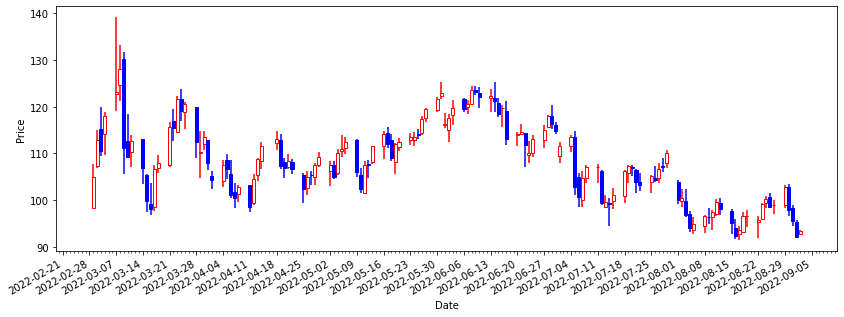

In [7]:
account.market.candle_plot('Brent',START_DAY) # 绘制布伦特蜡烛图

<module 'matplotlib.pyplot' from 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

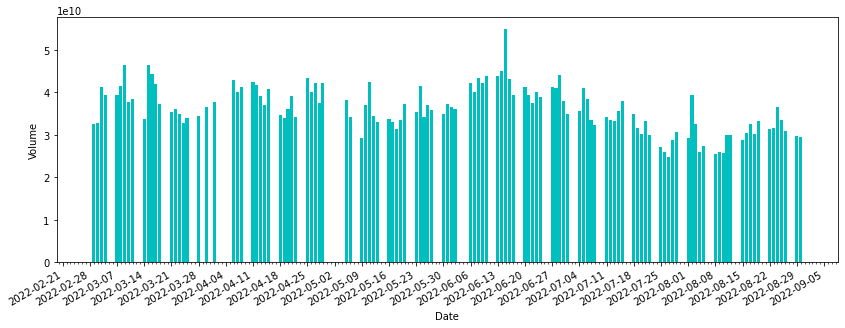

In [8]:
account.market.volume_plot('SSEA',START_DAY) # 绘制A股交易量

### 模拟交易

In [9]:
trader = qm.SimpleGridTrade(
    account=account,
    grid=GRID,
    batch=50000,
    duration=TEST_DAYS,
    establish={
        'SSEA': 150000,
        'BTC': 150000,
        'Brent':700000
    }
) # 实例化网格策略交易对象

c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({


In [10]:
# 回测网格交易
trader.run()

c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is 

Brent out of range at 2022-03-07 00:00:00
Brent out of range at 2022-03-08 00:00:00


c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is 

Brent out of range at 2022-06-02 00:00:00
Brent out of range at 2022-07-04 00:00:00


c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is 

Brent out of range at 2022-08-02 00:00:00


c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.history = self.history.append({
c:\Users\jayde\Desktop\test\quant_mock\_trader.py:92: FutureWarning: The frame.append method is 

### 查看回测效果

In [11]:
account.history

,date,name,change,position,price,balance,asset
0,2022-03-01,SSEA,41.0,41.0,3632.27,4851076.93,5001094.29
1,2022-03-01,BTC,3.0,3.0,42876.60,4722447.13,5007165.99
2,2022-03-01,Brent,7121.0,7121.0,98.30,4022452.83,5073889.76
3,2022-03-02,SSEA,-13.0,28.0,3654.27,4069958.34,5073697.47
4,2022-03-02,BTC,-1.0,2.0,45294.20,4115252.54,5074878.57
...,...,...,...,...,...,...,...
216,2022-08-29,SSEA,14.0,33.0,3352.17,4156939.48,5133318.57
217,2022-08-29,Brent,508.0,8797.0,98.25,4107028.48,5167424.42
218,2022-08-30,SSEA,-14.0,19.0,3399.16,4154616.72,5167528.70
219,2022-08-30,BTC,2.0,4.0,20120.90,4114374.92,5169218.10


In [12]:
account.revenue_details

,asset,rate,balance,SSEA,BTC,Brent
2022-03-01,5073889.76,0.014778,4022452.83,41.0,3.0,7121.0
2022-03-02,5127858.81,0.025572,4165210.28,28.0,2.0,6687.0
2022-03-03,5128260.33,0.025652,4212902.21,15.0,2.0,6687.0
2022-03-04,5128368.72,0.025674,4166063.47,28.0,2.0,6687.0
2022-03-05,5116980.72,0.023396,4205663.67,28.0,1.0,6687.0
...,...,...,...,...,...,...
2022-08-27,5140179.00,0.028036,4163568.26,19.0,4.0,8289.0
2022-08-28,5133521.00,0.026704,4203869.86,19.0,2.0,8289.0
2022-08-29,5167424.42,0.033485,4107028.48,33.0,2.0,8797.0
2022-08-30,5169218.10,0.033844,4114374.92,19.0,4.0,8797.0


<module 'matplotlib.pyplot' from 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

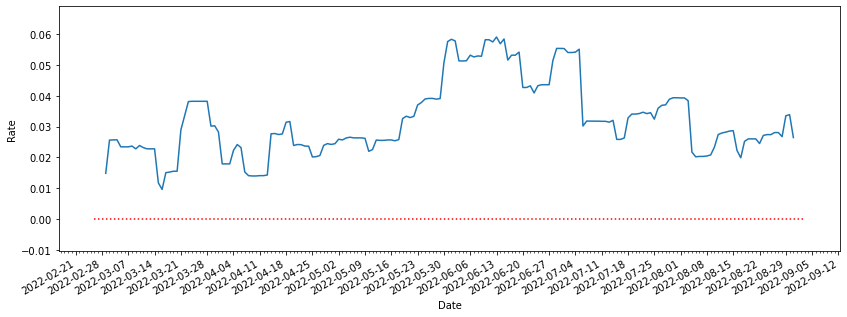

In [13]:
account.revenue_plot() # 收益率曲线

<module 'matplotlib.pyplot' from 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

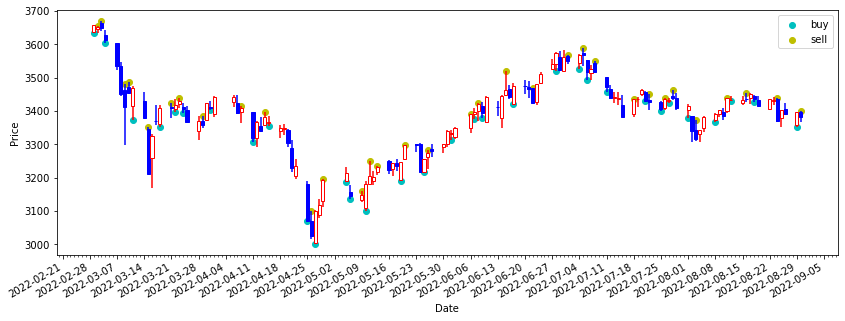

In [14]:
account.trade_details_plot('SSEA') # A股交易详情图